# Compute Architecure - Assessment
**Course**: TU 2025 25-26: 8645 -- COMPUTER INFRASTRUCTURE  
**Lecturer**: Ian McLauglin  
**Author**: Clyde Watts  








### Imports

yfinance - financial ticker data from yahoo  - [yfinance](https://github.com/ranaroussi/yfinance)
datetime - pythons inbuild date time
logging - python logging
os - operating system functions
glob - file selector

In [3]:
import yfinance
import logging
from datetime import datetime, timedelta
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Initialisation

In [4]:
# init logging
logging.basicConfig(level=logging.INFO)

## Problem 1: Data from yfinance

Using the [yfinance](https://github.com/ranaroussi/yfinance) Python package, write a function called `get_data()` that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

The function should save the data into a folder called `data` in the root of your repository using a filename with the format `YYYYMMDD-HHmmss.csv` where `YYYYMMDD` is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. `09` for September), followed by the two digit day, and `HHmmss` is hour, minutes, seconds.
Create the `data` folder if you don't already have one.

Problem 1: Requirements

##Extract##

1. Extract from yfinance data the stock data for META,AAPL,AMZN,NFLX,GOOG
2. For 5 complete previous days , that is TODAY - 6 days to TODAY -1 day , exclude TODAY because it is not complete
3. File format will YYYYMMDD-HHmmss.csv where YYYY - is 4 digit year , MM month 01-12 , DD - is 01-31. HH - hours , 24 our clock , mm - minutes 00-59 , seconds 00-59.
4. Grain - Hour

Column
Date , <ticket> ( Open,High,Low,Close,Volume) ....
ticket is META , AAPL , AMZN , NFLX or GOOG
Open - open price
Close - close price
High - High pricr
Low - Low price
Volumn - Volume in period

The data frame return has an index on the date , and is a multilevel index. Level one is the ticket , and the second level is the metric - that is open , close , high , low prices and volume 
 

Question - What about Daylight saving time - over and under hour every size months

In [5]:
# prototype for extracting stock data
tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]
def get_data(tickers = tickers,start_date=None, end_date=None,interval="1h",data_path="./data/"):
    """
    Function to get stock data from yfinance

    Parameters:
    tickers (list): List of stock tickers to download data for
    start_date (str): Start date for data in format "YYYY-MM-DD". If None, defaults to 6 days ago.
    end_date (str): End date for data in format "YYYY-MM-DD". If None, defaults to yesterday.
    interval (str): Data interval. Default is "1h".
    data_path (str): Path to save the data. Default is "./data/".
    Returns:
    df_data (DataFrame): DataFrame containing the stock data
    file_name (str): Name of the file where data is saved
    """
    if start_date is None:
        start_date = (datetime.now() - timedelta(days=6)).strftime("%Y-%m-%d")
        # create file name based on current date and time
        file_name = f"{data_path}{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
    else:
        # convert start_date to datetime object
        start_date_time = datetime.strptime(start_date, "%Y-%m-%d")
        # create file name based on start time and 23:59:59 of end date
        start_date_str = start_date_time.strftime("%Y%m%d") + "_235959"
        file_name = f"{data_path}{start_date_str}.csv"
    if end_date is None:
        end_date = (datetime.now() - timedelta(days=1)).strftime("%Y-%m-%d")
    # check if directory exists
    if not os.path.exists(data_path):
        logging.info(f"Creating directory: {data_path}")
        os.makedirs(data_path)
    # if file exists then delete it
    if os.path.exists(file_name):
        logging.info(f"Deleting existing file: {file_name}")
        os.remove(file_name)
    logging.info(f"Start Date: {start_date}, End Date: {end_date}")
    df_data = yfinance.download(tickers, interval=interval, group_by='ticker',start=start_date, end=end_date)
    # Save the data to a CSV file
    df_data.to_csv(file_name)
    return df_data
   



In [6]:
df = get_data(tickers=tickers)

INFO:root:Start Date: 2025-09-28, End Date: 2025-10-03
C:\Users\cw171001\AppData\Local\Temp\ipykernel_49252\2418543891.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_data = yfinance.download(tickers, interval=interval, group_by='ticker',start=start_date, end=end_date)
[*********************100%***********************]  5 of 5 completed


## Problem 2: Plotting Data

Write a function called `plot_data()` that opens the latest data file in the `data` folder and, on one plot, plots the `Close` prices for each of the five stocks.
The plot should include axis labels, a legend, and the date as a title.
The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`.
Create the `plots` folder if you don't already have one.

Requirements

1. Glob the data folder for YYYYMMDD_hhmmss.csv files. 
    1. We will glob the files looking for the pattern 20*.*csv
    1.

References

https://docs.python.org/3/library/glob.html


In [7]:
def get_the_latest_file(data_path="./data/"):
    """get_the_latest_file

    Args:
        data_path (str): The path to the directory containing the data files.

    Returns:
        str: The path to the latest data file, or None if no files are found.
    """

    logging.info(f"Getting the latest file from {data_path}")
    # File pattern
    file_pattern = "20[0-9][0-9][0-1][0-9][0-3][0-9]_[0-9][0-9][0-9][0-9][0-9][0-9].csv"
    # Add path to file pattern
    file_pattern = os.path.join(data_path, file_pattern)
    list_of_files = glob.glob(file_pattern) 
    if not list_of_files:
        logging.warning(f"No files found in {data_path} matching pattern {file_pattern}")
        return None
    latest_file = max(list_of_files, key=os.path.getctime)
    logging.info(f"Latest file: {latest_file}")
    return latest_file

### Load data from 

In [8]:
file = get_the_latest_file()
print(file)


INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251004_140850.csv


./data\20251004_140850.csv


In [9]:
def load_file_into_dataframe(file):
    """load_file_into_dataframe

    Args:
        file (str): The path to the data file.

    Returns:
        pd.DataFrame: The data as a pandas DataFrame.
    """
    if file is None:
        logging.error("No file provided to load into dataframe.")
        return None
    df = pd.read_csv(file, header=[0,1], index_col=0, parse_dates=True)
    return df



In [10]:
file = get_the_latest_file()
df = load_file_into_dataframe(file)

INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251004_140850.csv


### Investigate Data Frame

Have a look at the dataframe and see it's structure. 

https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download

The index is DatetimeIndex - that is the timestamp of the price.
The data appears Company/Ticker - and then metrics - open,high,low,close,volume



In [11]:
# Have a look at the index and columns
print(" Data Frame Info")
print(df.info(verbose=True))
#print(df.columns)

 Data Frame Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2025-09-29 13:30:00+00:00 to 2025-10-02 19:30:00+00:00
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (META, Open)    28 non-null     float64
 1   (META, High)    28 non-null     float64
 2   (META, Low)     28 non-null     float64
 3   (META, Close)   28 non-null     float64
 4   (META, Volume)  28 non-null     int64  
 5   (AMZN, Open)    28 non-null     float64
 6   (AMZN, High)    28 non-null     float64
 7   (AMZN, Low)     28 non-null     float64
 8   (AMZN, Close)   28 non-null     float64
 9   (AMZN, Volume)  28 non-null     int64  
 10  (GOOG, Open)    28 non-null     float64
 11  (GOOG, High)    28 non-null     float64
 12  (GOOG, Low)     28 non-null     float64
 13  (GOOG, Close)   28 non-null     float64
 14  (GOOG, Volume)  28 non-null     int64  
 15  (AAPL, Open)    28 non-null     float64
 16  (AAPL, High)   

INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251004_140850.csv
INFO:root:Loading data from file: ./data\20251004_140850.csv


The latest file name is: ./data\20251004_140850.csv
Filename only: 20251004_140850.csv
Filename without extension: 20251004_140850
PNG Filename: 20251004_140850.png
PNG File Path: ./data/20251004_140850.png


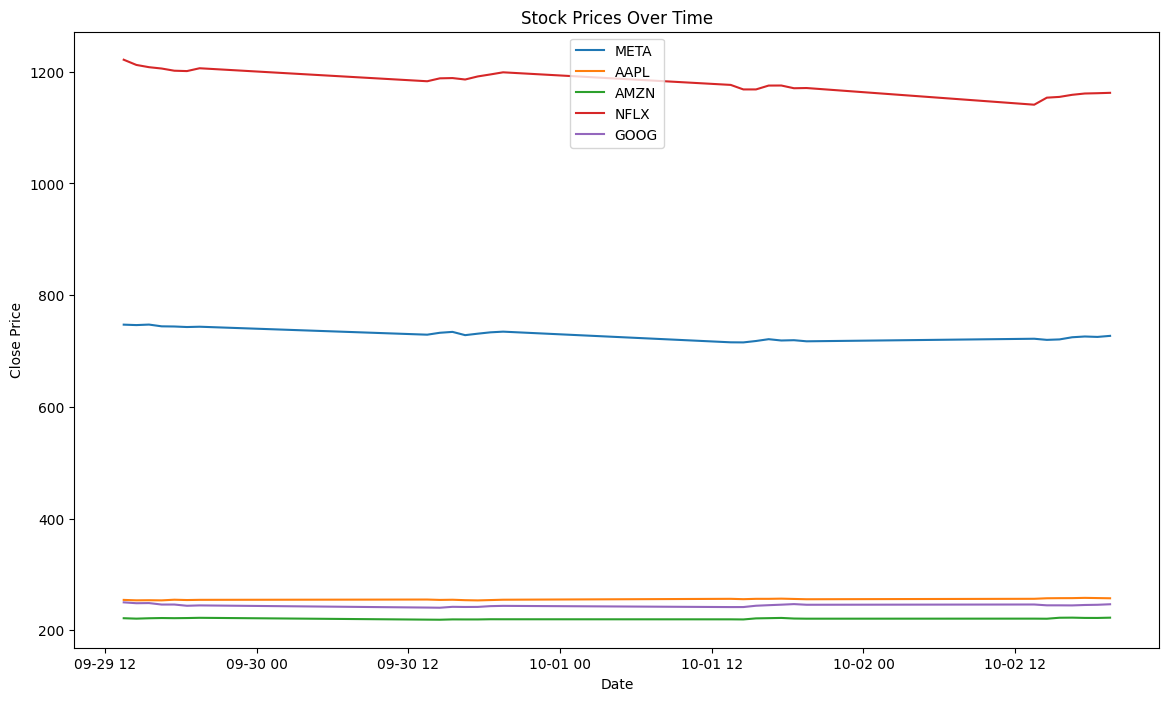

In [12]:
### Attempt to do plot and write to file

# Look for latest file
latest_csv_filename = get_the_latest_file()
print("The latest file name is:", latest_csv_filename)
logging.info(f"Loading data from file: {latest_csv_filename}")
# pull the date and timestamp out of file name
filename_only = os.path.basename(latest_csv_filename)  # get filename without path
print("Filename only:", filename_only)
# remove file extension from filename - in this case .csv
filename_no_ext = os.path.splitext(filename_only)[0]
print("Filename without extension:", filename_no_ext)
# create png filename 
filename_png = filename_no_ext + ".png"
print("PNG Filename:", filename_png)
df = load_file_into_dataframe(latest_csv_filename)
data_path = "./data/"
# create full path for png file
png_file_path = os.path.join(data_path, filename_png)
print("PNG File Path:", png_file_path)
plt.figure(figsize=(14, 8))
for ticker in tickers:
    plt.plot(df.index, df[(ticker, 'Close')], label=ticker)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Prices Over Time')
plt.legend()
#plt.show()
plt.savefig(png_file_path)

In [13]:
def plot_data(df, png_file_path):
    """plot_data

    Args:
        df (pd.DataFrame): The data as a pandas DataFrame.
        png_file_path (str): The path to save the plot image.

    Returns:
        None
    """
    if df is None or png_file_path is None:
        logging.error("DataFrame or PNG file path is None.")
        return
    plt.figure(figsize=(14, 8))
    for ticker in tickers:
        plt.plot(df.index, df[(ticker, 'Close')], label=ticker)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Stock Prices Over Time')
    plt.legend()
    plt.savefig(png_file_path)
    logging.info(f"Plot saved to {png_file_path}")

INFO:root:Plot saved to ./data/20251004_140850.png


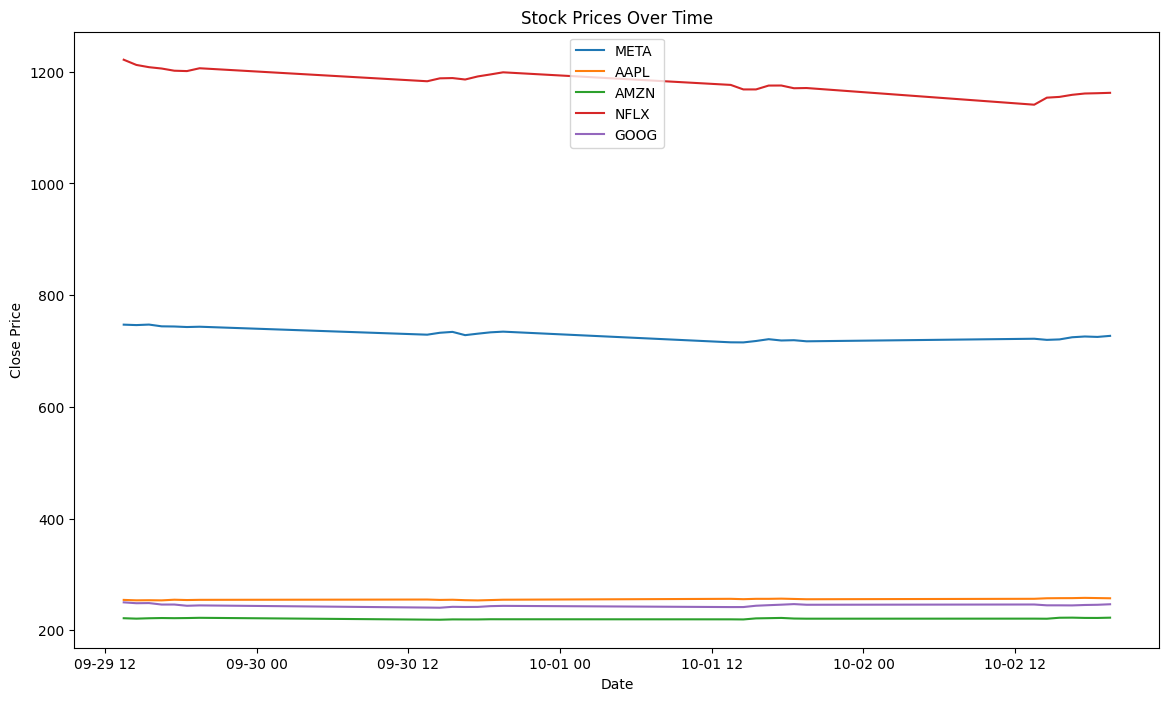

In [14]:
plot_data(df, png_file_path)
#------------------------------------------------------------------------------
